In [1]:
from dask.distributed import Client

In [2]:
client = Client(threads_per_worker=1)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39497 instead
  warnings.warn(


In [3]:
client

<Client: 'tcp://127.0.0.1:44219' processes=12 threads=12, memory=46.00 GiB>

In [4]:
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
cd /g/data/tm70/as2285/om3-scripts/expts_manager/r_25march/revised_evp_True

/g/data/tm70/as2285/om3-scripts/expts_manager/r_25march/revised_evp_True


In [6]:
! grep remap ice_in

  advection = "remap"
  maskhalo_remap = .true.


In [9]:
! grep revised ice_in

    revised_evp = True


In [10]:
! grep cf ice_in

In [11]:
! grep DT archive/output000/MOM_parameter_doc.all

DT = 1350.0                     !   [s]
                                ! be an integer fraction of the forcing time-step (DT_FORCING in ocean-only mode
DT_THERM = 1350.0               !   [s] default = 1350.0
                                ! The thermodynamic and tracer advection time step. Ideally DT_THERM should be
                                ! an integer multiple of DT and less than the forcing or coupling time-step,
                                ! unless THERMO_SPANS_COUPLING is true, in which case DT_THERM can be an integer
                                ! multiple of the coupling timestep.  By default DT_THERM is set to DT.
                                ! that is less than or equal to DT_THERM.
DTBT_RESET_PERIOD = 0.0         !   [s] default = 1350.0
                                ! The period between recalculations of DTBT (if DTBT <= 0). If DTBT_RESET_PERIOD
                                ! is negative, DTBT is set based only on information available at
           

In [12]:
grid_ds = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc')

In [13]:
grid_ds

<xarray.Dataset> Size: 93MB
Dimensions:     (xt_ocean: 1440, yt_ocean: 1080, time: 1, xu_ocean: 1440,
                 yu_ocean: 1080)
Coordinates:
  * xt_ocean    (xt_ocean) float64 12kB -279.9 -279.6 -279.4 ... 79.62 79.88
  * yt_ocean    (yt_ocean) float64 9kB -81.08 -80.97 -80.87 ... 89.84 89.95
  * time        (time) object 8B 0002-01-01 00:00:00
  * xu_ocean    (xu_ocean) float64 12kB -279.8 -279.5 -279.2 ... 79.5 79.75 80.0
  * yu_ocean    (yu_ocean) float64 9kB -81.02 -80.92 -80.81 ... 89.79 89.89 90.0
    geolon_t    (yt_ocean, xt_ocean) float32 6MB ...
    geolat_t    (yt_ocean, xt_ocean) float32 6MB ...
    geolon_c    (yu_ocean, xu_ocean) float32 6MB ...
    geolat_c    (yu_ocean, xu_ocean) float32 6MB ...
Data variables:
    ht          (yt_ocean, xt_ocean) float32 6MB ...
    hu          (yu_ocean, xu_ocean) float32 6MB ...
    dxt         (yt_ocean, xt_ocean) float32 6MB ...
    dyt         (yt_ocean, xt_ocean) float32 6MB ...
    dxu         (yu_ocean, xu_ocean) float32 6MB ...
    dyu         (yu_ocean, xu_ocean) float32 6MB ...
    area_t      (yt_ocean, xt_ocean) float32 6MB ...
    area_u      (yu_ocean, xu_ocean) float32 6MB ...
    kmt         (yt_ocean, xt_ocean) float32 6MB ...
    kmu         (yu_ocean, xu_ocean) float32 6MB ...
    drag_coeff  (time, yu_ocean, xu_ocean) float32 6MB ...
Attributes:
    filename:   ocean_grid.nc
    title:      MOM5
    grid_type:  mosaic
    grid_tile:  1

In [14]:
grid_ds=grid_ds.rename({'xt_ocean':'ni', 'yt_ocean':'nj'})

# And with the inst output

In [15]:
inst_files = ! ls archive/output*/access-om3.cice_inst.1901-03-*.nc

In [16]:
inst_files

['archive/output000/access-om3.cice_inst.1901-03-26-01350.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-02700.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-04050.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-05400.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-06750.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-08100.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-09450.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-10800.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-12150.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-13500.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-14850.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-16200.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-17550.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-18900.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-20250.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-216

In [17]:
inst_ds = xr.open_mfdataset(inst_files)

In [18]:
inst_ds['TLON']=grid_ds['geolon_t']

In [19]:
inst_ds['TLAT']=grid_ds['geolat_t']

In [20]:
crash_point = inst_ds.isel(ni=1068,nj=1001)

In [21]:
crash_point

<xarray.Dataset> Size: 34kB
Dimensions:      (time: 64, nbnd: 2, nkice: 4, nksnow: 1, nkbio: 3, nkaer: 5,
                  nc: 5)
Coordinates:
  * time         (time) object 512B 1901-03-26 00:11:15 ... 1901-03-26 23:48:45
    NCAT         (nc) float64 40B dask.array<chunksize=(5,), meta=np.ndarray>
    ni           float64 8B -12.88
    nj           float64 8B 81.71
    geolon_t     float32 4B ...
    geolat_t     float32 4B ...
Dimensions without coordinates: nbnd, nkice, nksnow, nkbio, nkaer, nc
Data variables: (12/50)
    time_bounds  (time, nbnd) object 1kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    VGRDi        (time, nkice) float64 2kB dask.array<chunksize=(1, 4), meta=np.ndarray>
    VGRDs        (time, nksnow) float64 512B dask.array<chunksize=(1, 1), meta=np.ndarray>
    VGRDb        (time, nkbio) float64 2kB dask.array<chunksize=(1, 3), meta=np.ndarray>
    VGRDa        (time, nkaer) float64 3kB dask.array<chunksize=(1, 5), meta=np.ndarray>
    blkmask      (time) float64 512B dask.array<chunksize=(1,), meta=np.ndarray>
    ...           ...
    dvidtd_1     (time) float64 512B dask.array<chunksize=(1,), meta=np.ndarray>
    dvirdgdt_1   (time) float64 512B dask.array<chunksize=(1,), meta=np.ndarray>
    aicen_1      (time, nc) float64 3kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    dvirdgndt_1  (time, nc) float64 3kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    TLON         float32 4B ...
    TLAT         float32 4B ...
Attributes:
    title:               access-om3
    contents:            Diagnostic and Prognostic Variables
    source:              CICE Sea Ice Model, unknown_version_name
    comment:             All years have exactly 365 days
    comment2:            File written on model date 19010326
    comment3:            seconds elapsed into model date:   1350
    time_period_freq:    step_1
    time_axis_position:  middle
    conventions:         CF-1.0
    history:             This dataset was created on 2024-11-28 at 15:50
    io_flavor:           io_pio2 hdf5

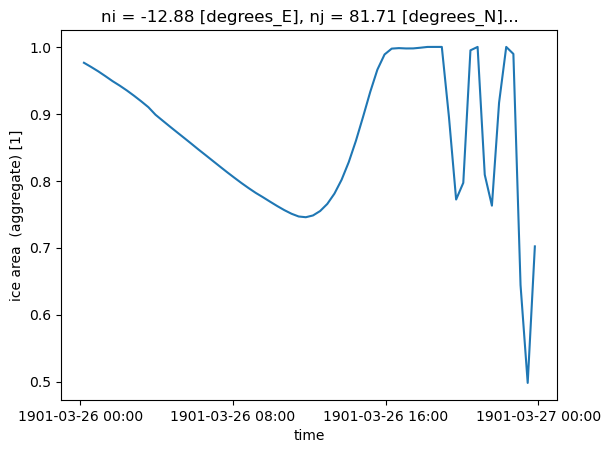

In [22]:
crash_point.aice_1.plot()

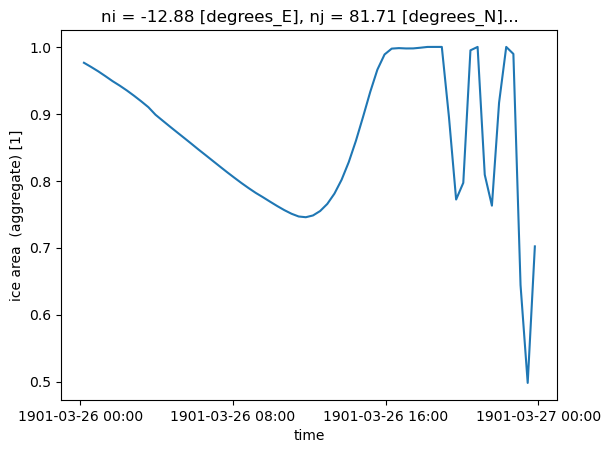

In [23]:
crash_point.aice_1.plot()

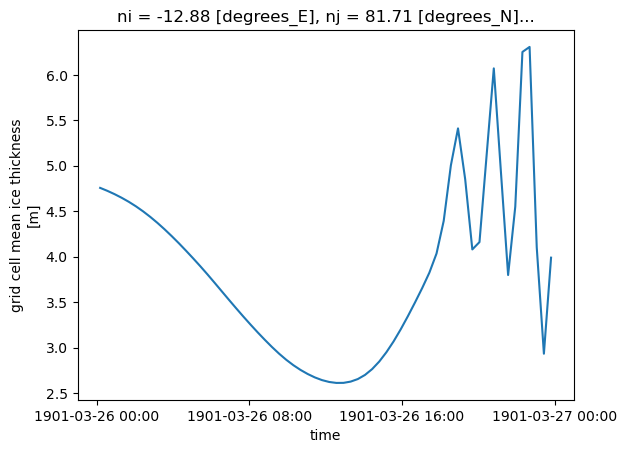

In [26]:
crash_point.hi_1.plot()

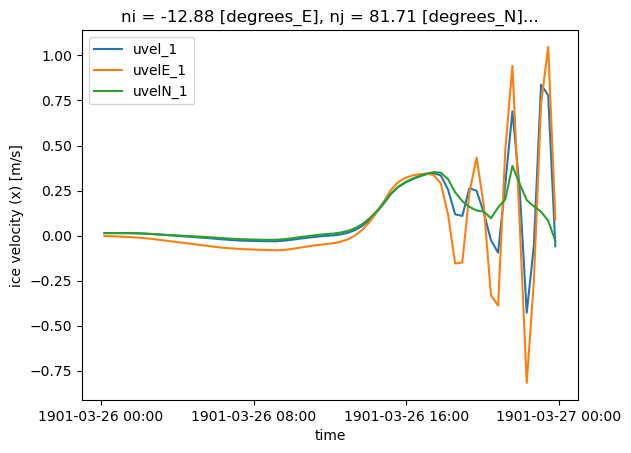

In [27]:
for v in ['uvel_1',#'vvel_1', 
          'uvelE_1', #'vvelE_1', 
          'uvelN_1', #'vvelN_1'
         ]:
    crash_point[v].isel(time=slice(-100,None)).plot(label=v)

plt.legend()

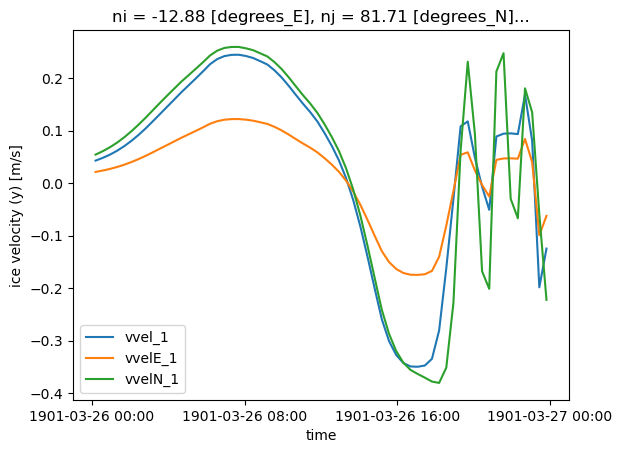

In [28]:
for v in ['vvel_1', 
          'vvelE_1', 
          'vvelN_1'
         ]:
    crash_point[v].isel(time=slice(-100,None)).plot(label=v)

plt.legend()

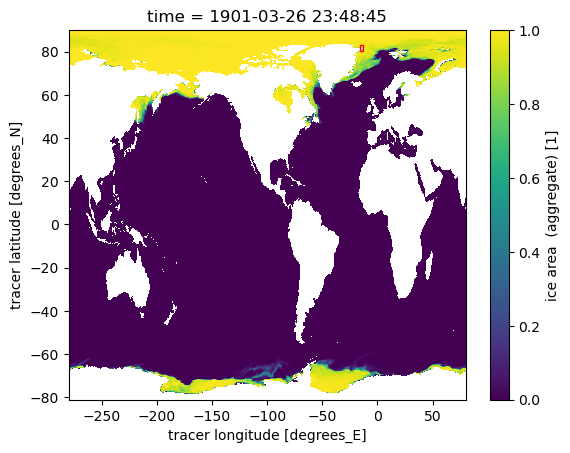

In [29]:
plt.figure()
ax = plt.subplot()

inst_ds.aice_1.isel(time=-1).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
# plt.ylim([75,85])
# plt.xlim([-20,-10])

ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='red', fill=None))
ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.1, height=0.1, color='black', fill=None))

plt.show()

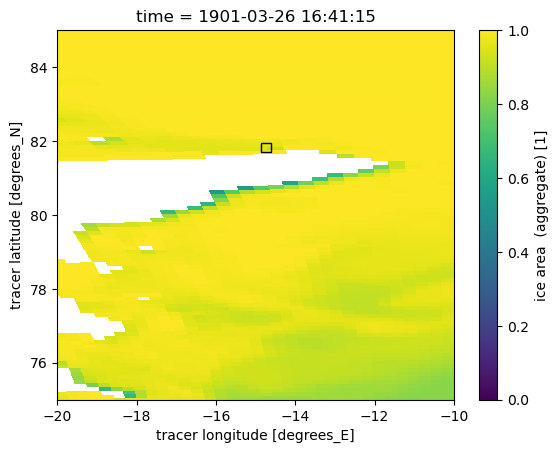

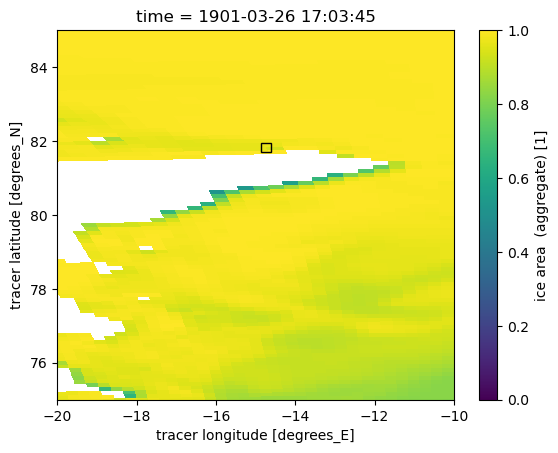

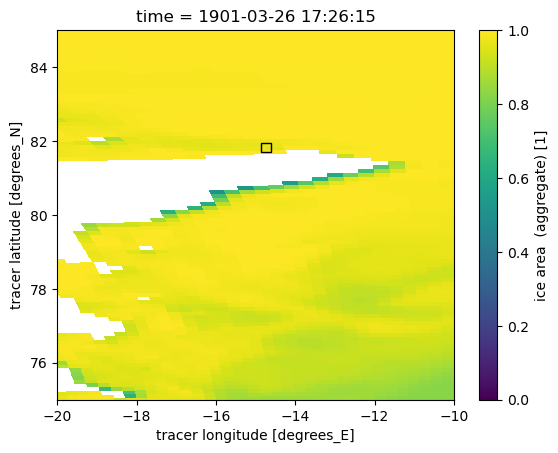

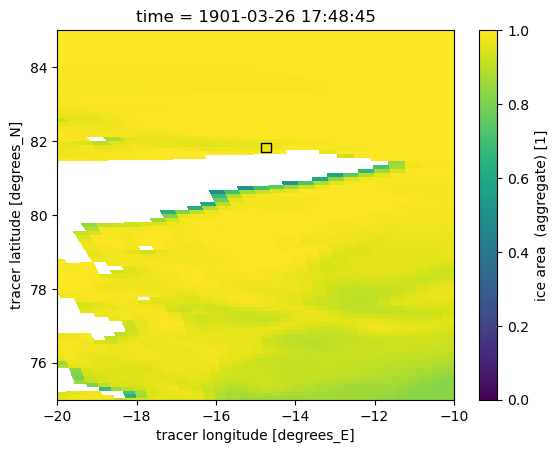

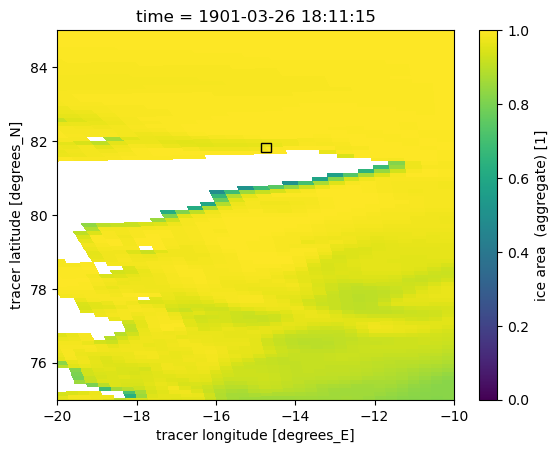

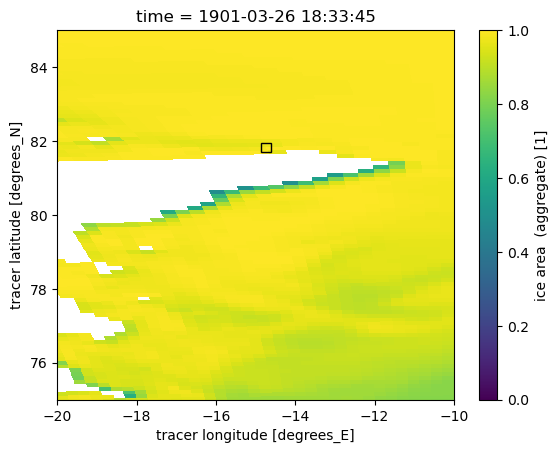

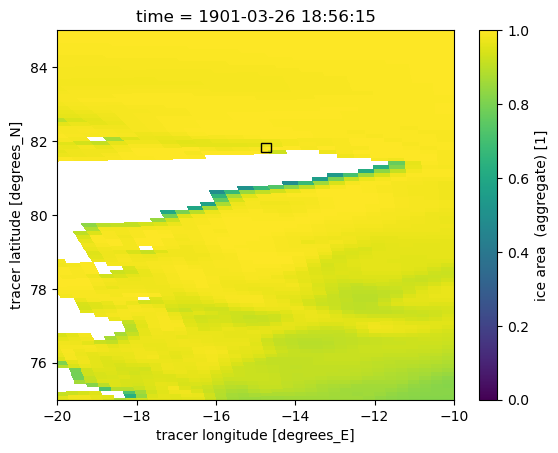

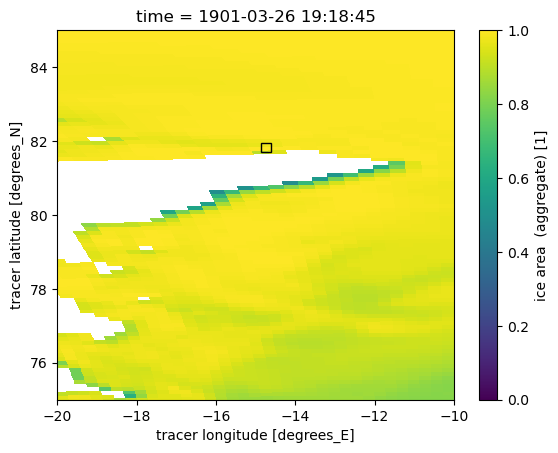

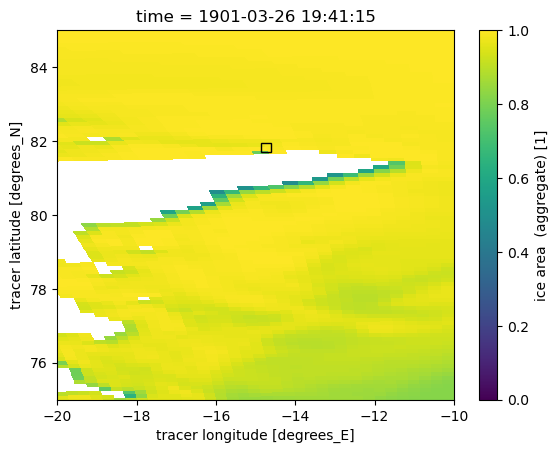

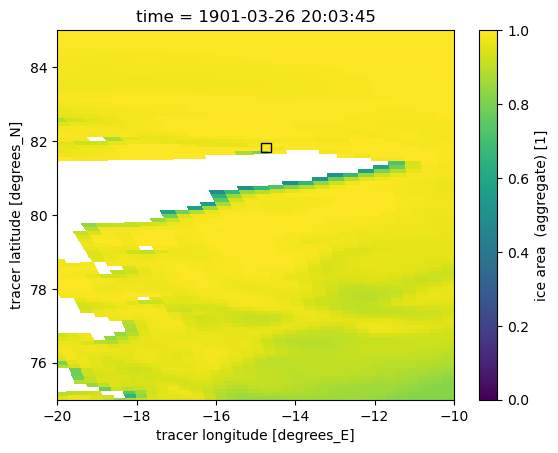

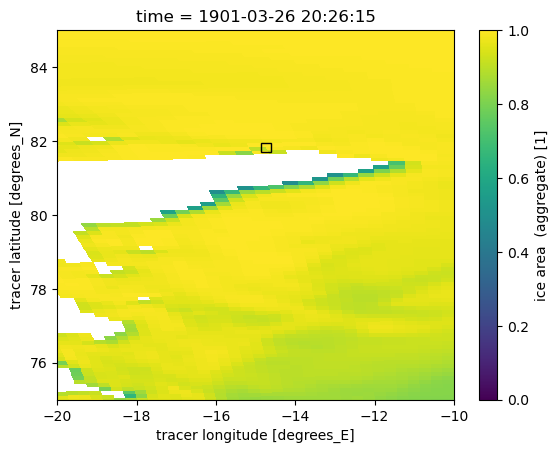

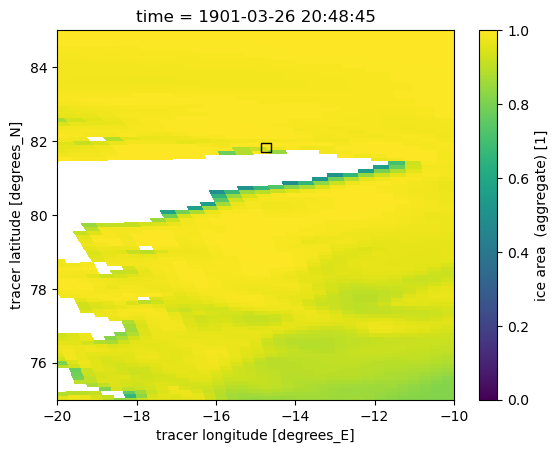

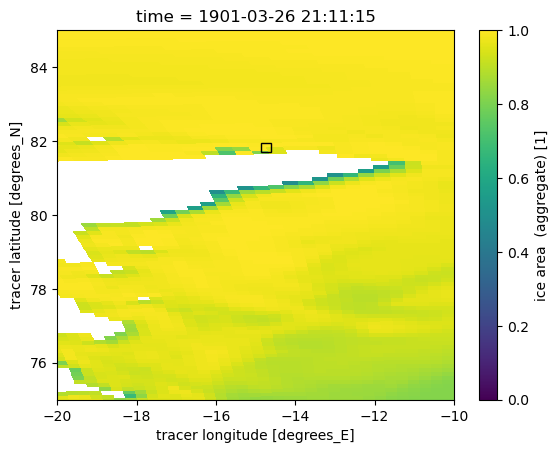

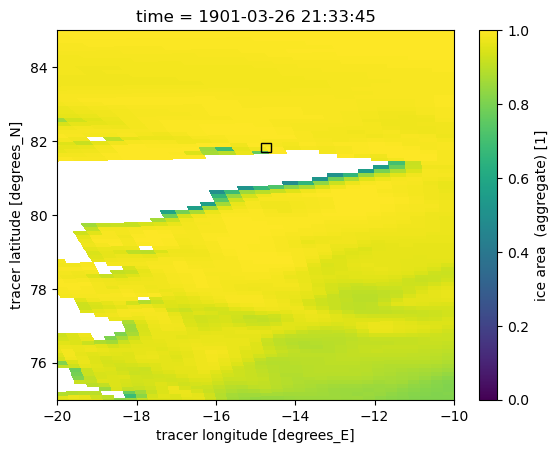

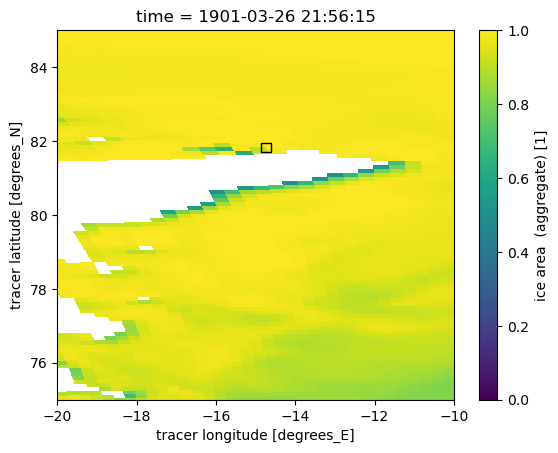

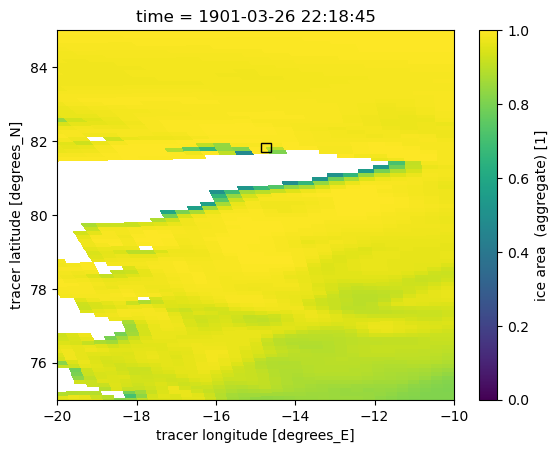

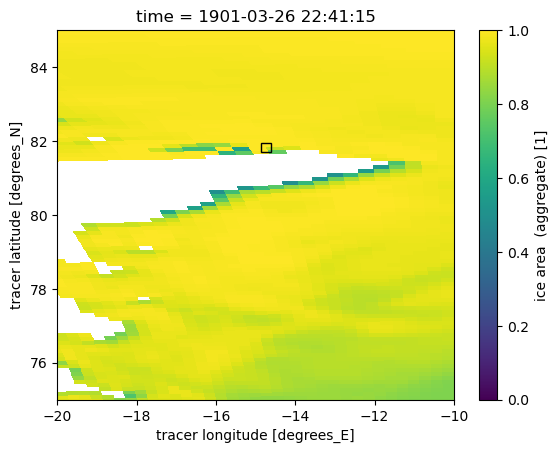

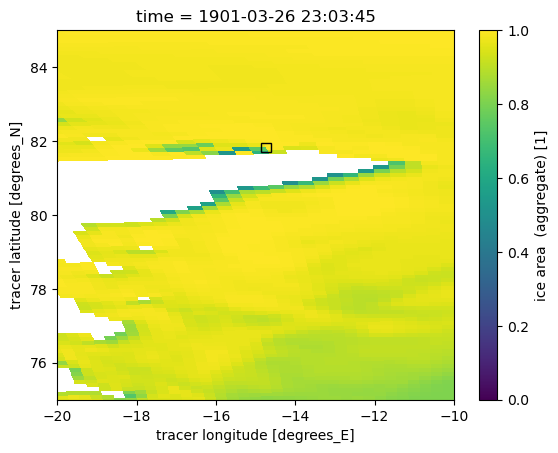

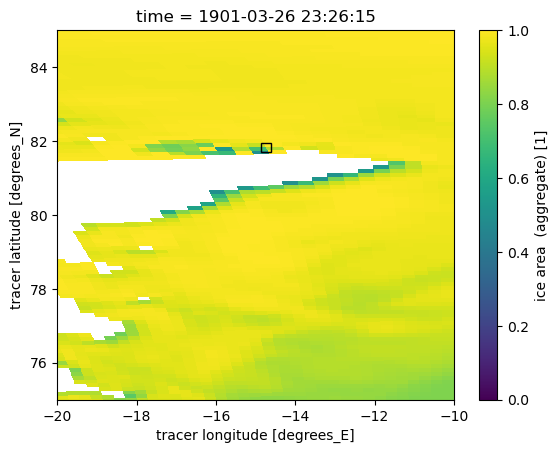

In [30]:
for t in range(-20,-1,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.aice_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


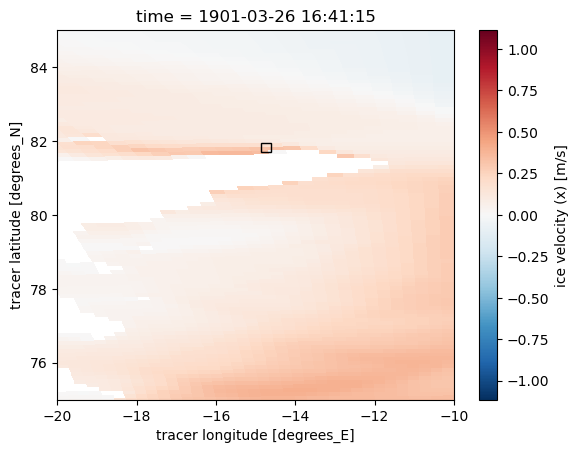

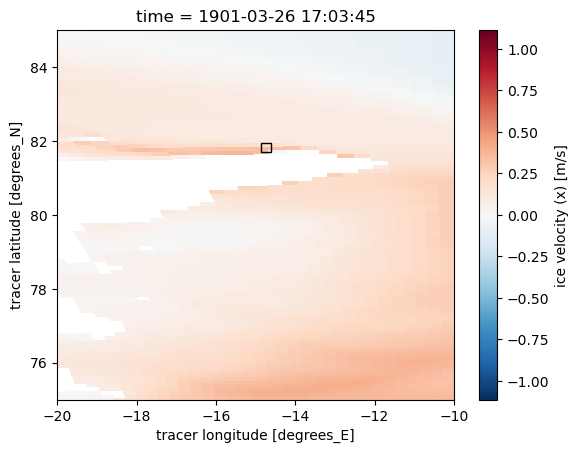

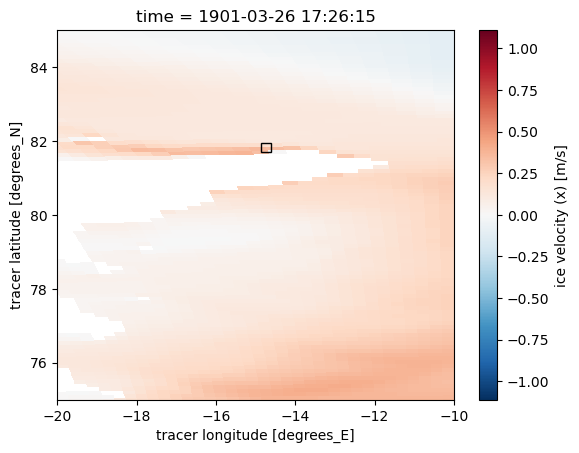

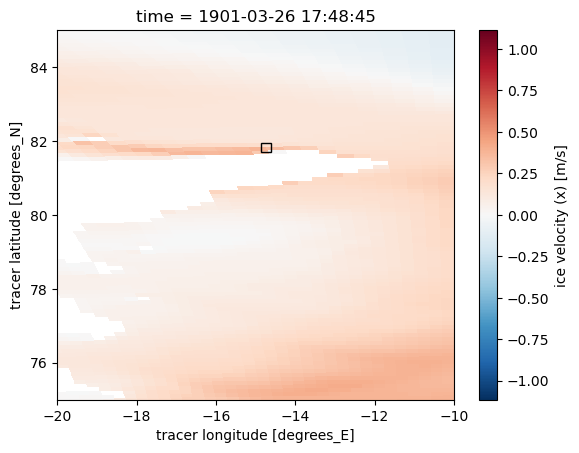

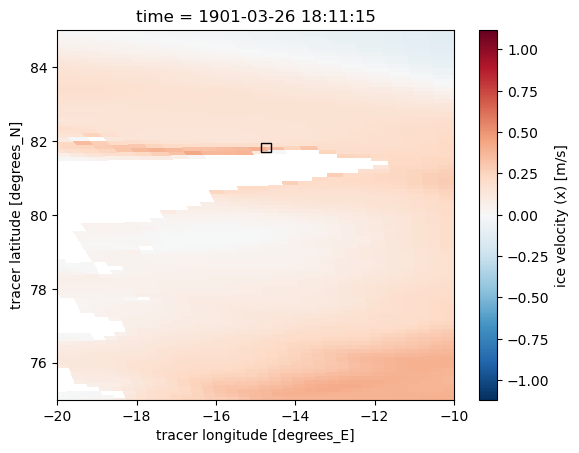

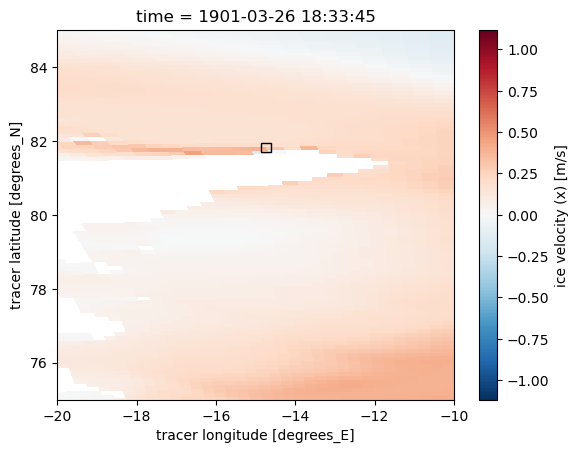

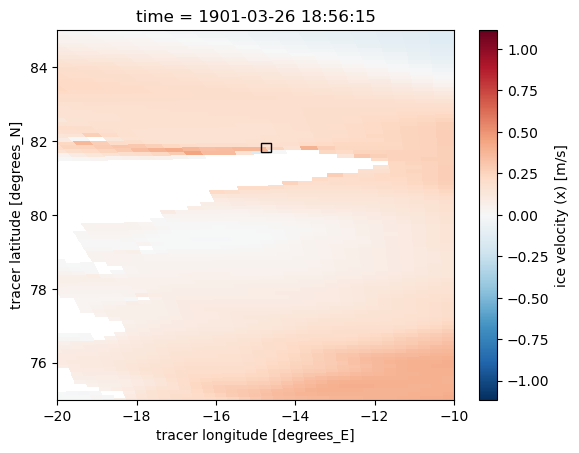

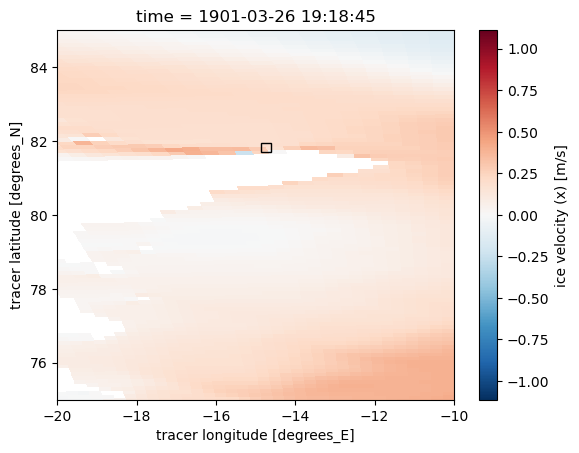

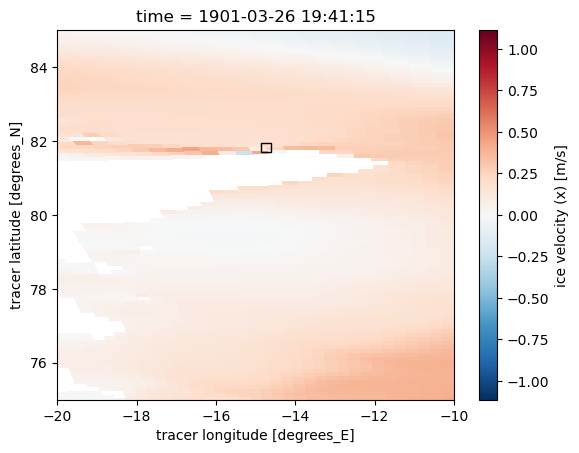

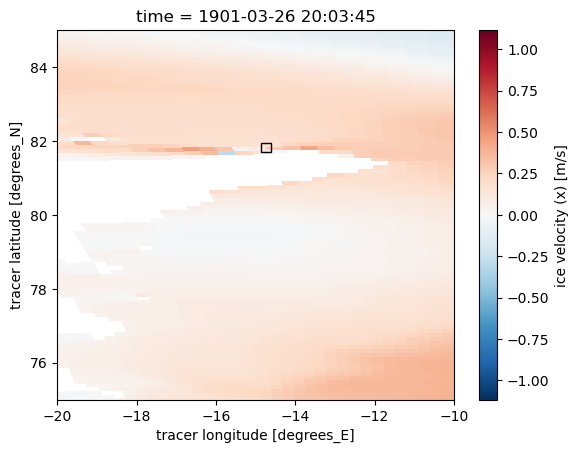

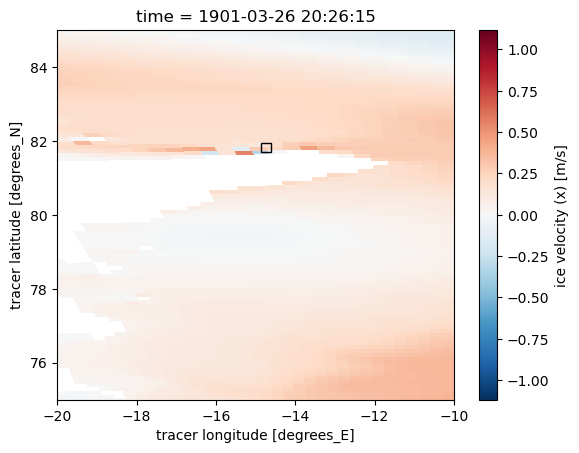

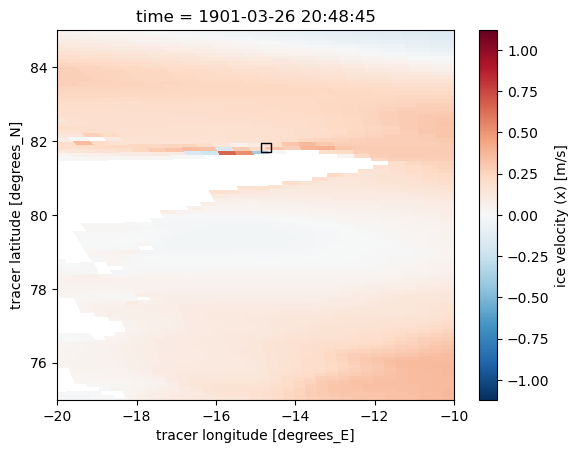

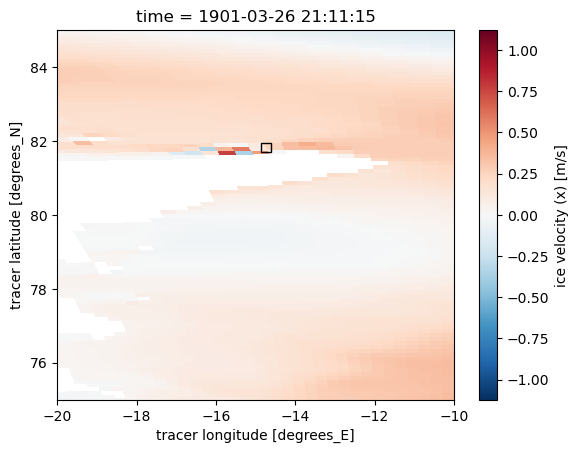

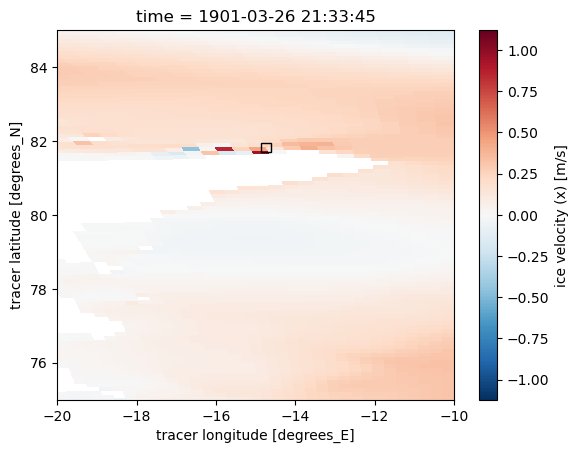

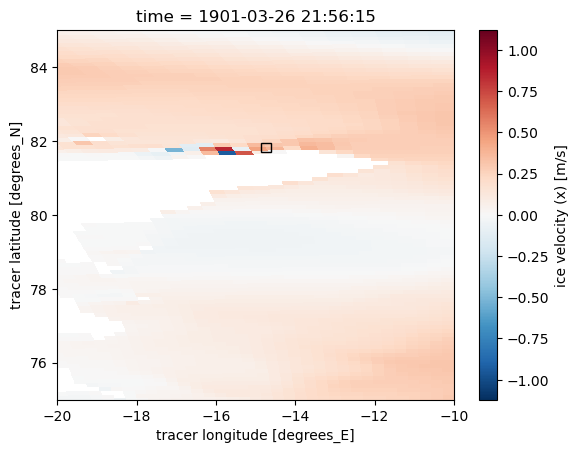

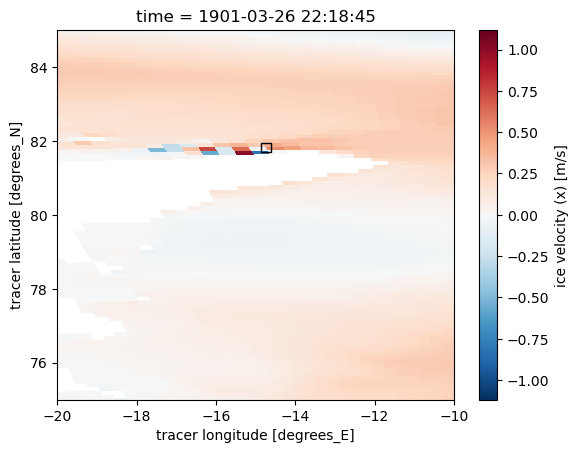

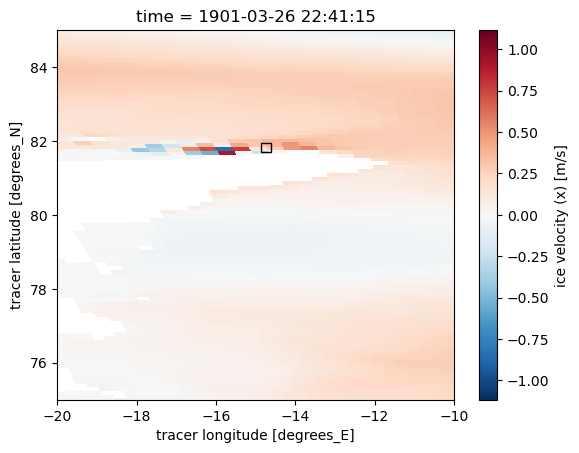

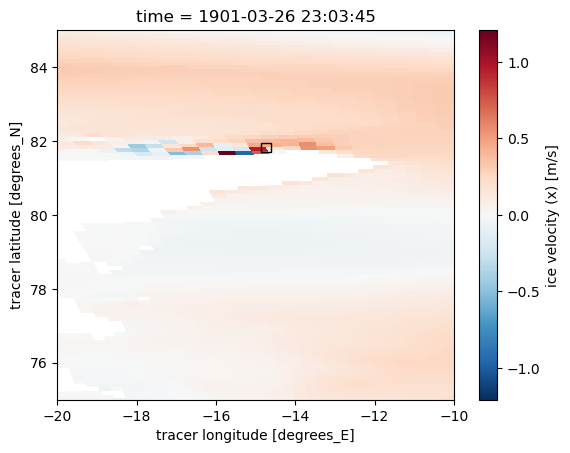

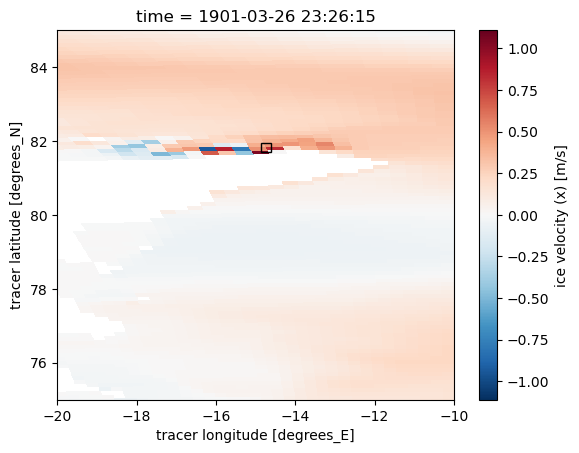

In [31]:
for t in range(-20,-1,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.uvelE_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


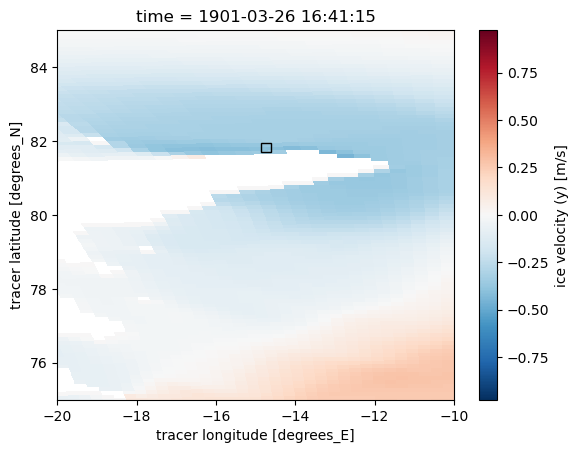

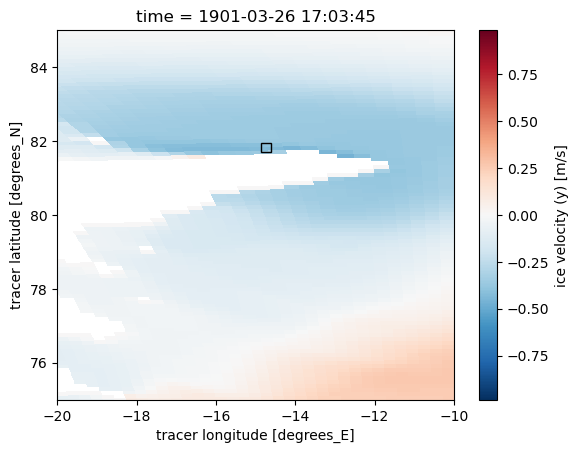

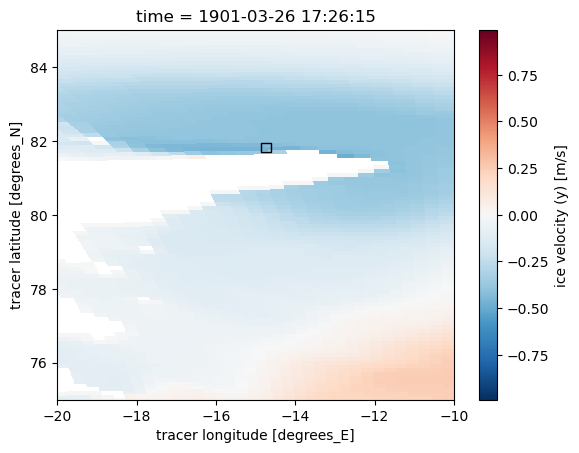

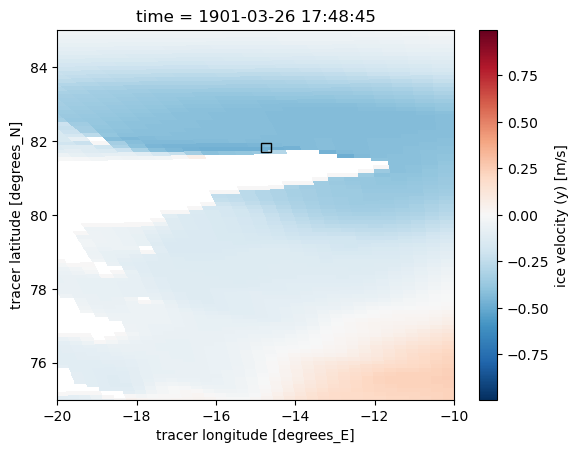

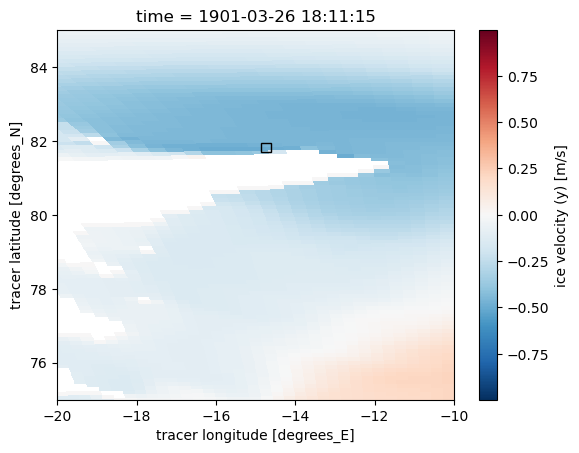

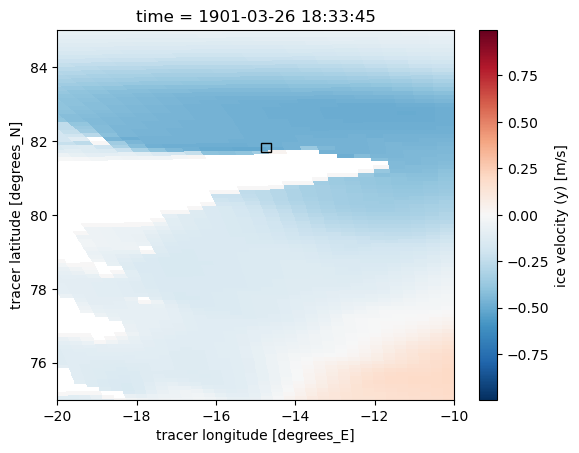

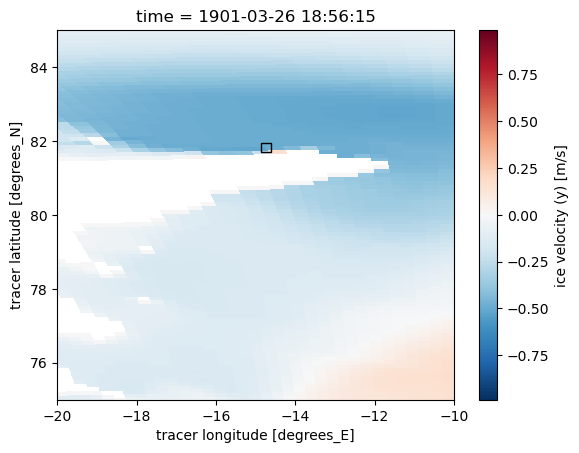

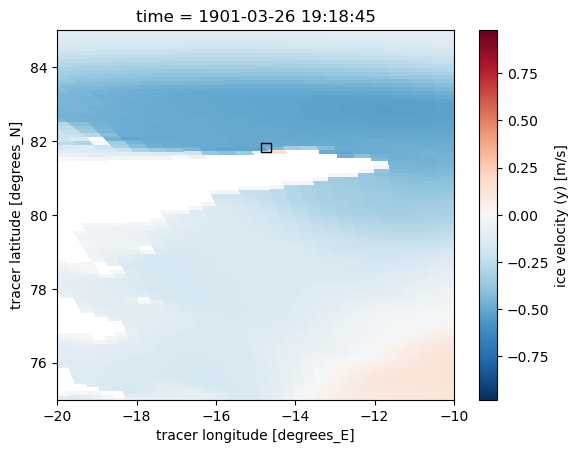

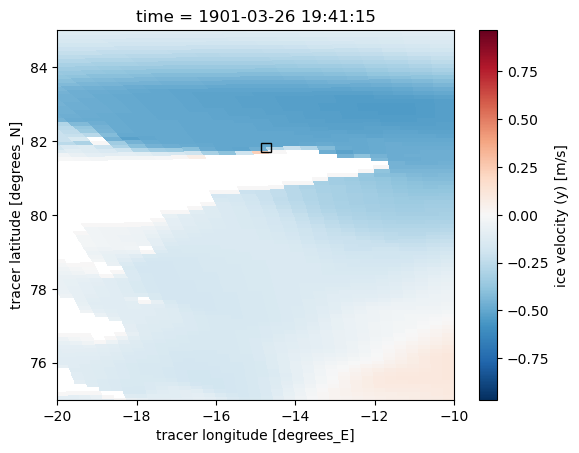

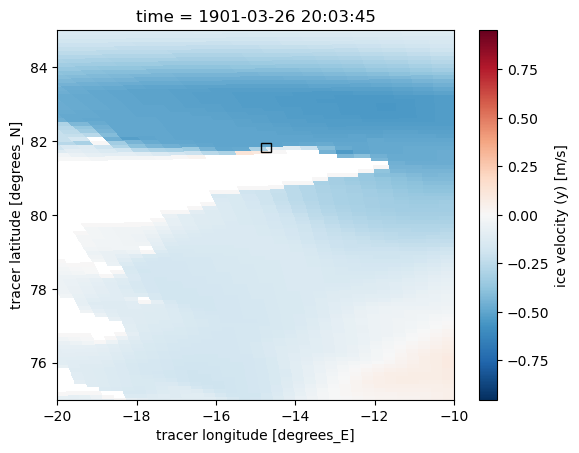

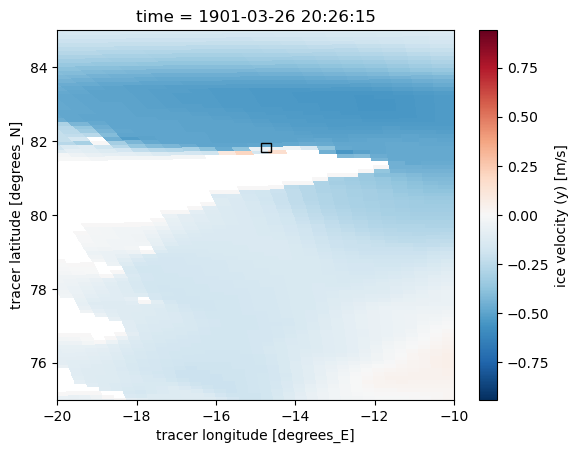

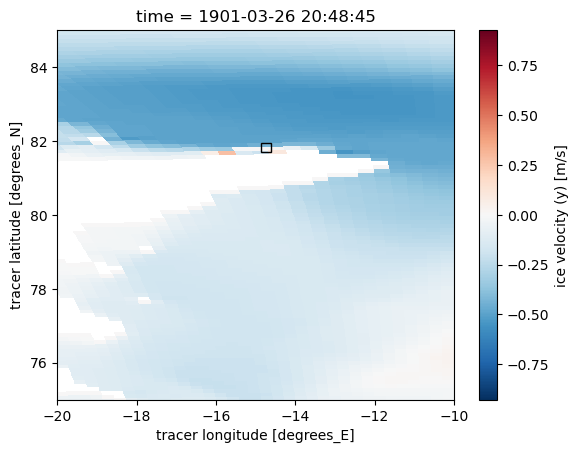

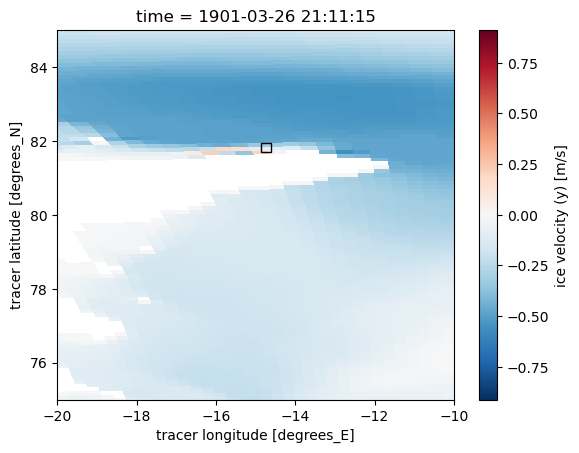

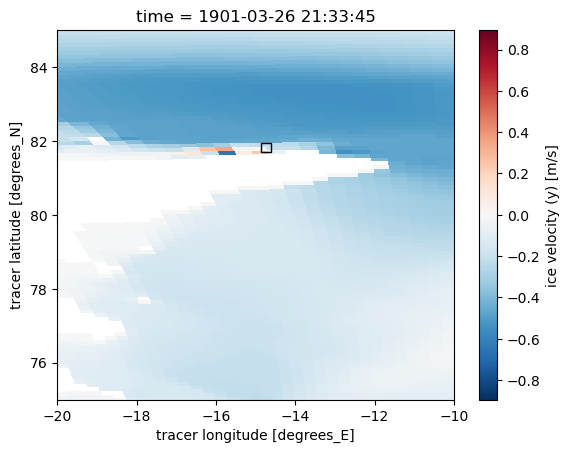

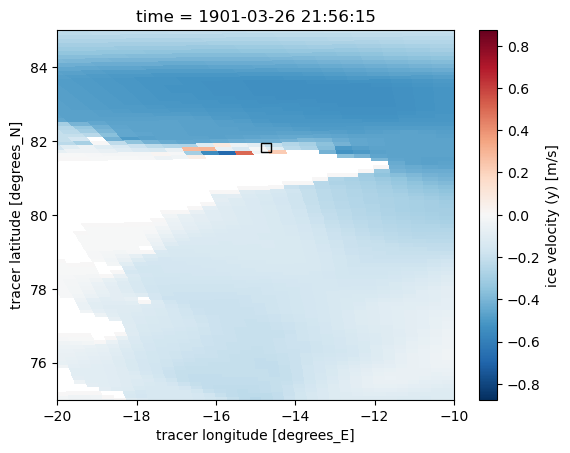

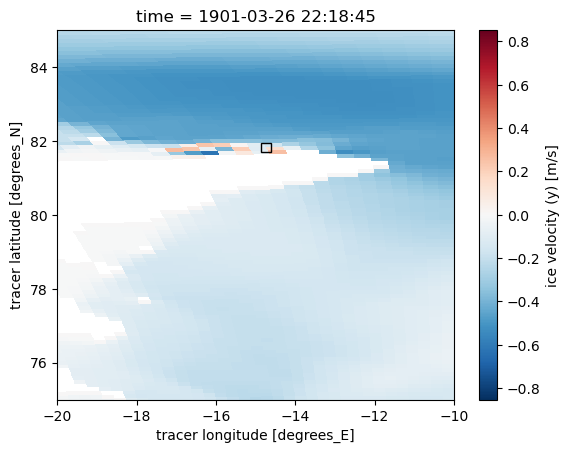

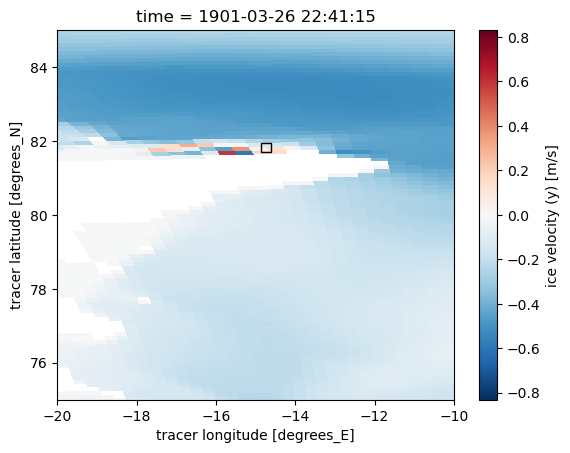

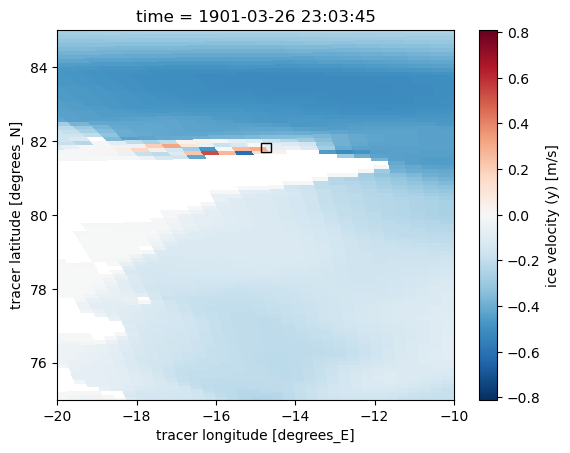

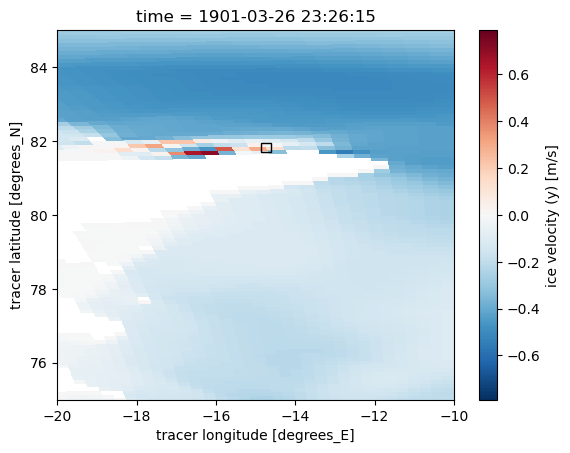

In [32]:
for t in range(-20,-1,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.vvelN_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


In [38]:
inst_ds

<xarray.Dataset> Size: 37GB
Dimensions:      (time: 64, nbnd: 2, nkice: 4, nksnow: 1, nkbio: 3, nkaer: 5,
                  nj: 1080, ni: 1440, nc: 5)
Coordinates:
  * time         (time) object 512B 1901-03-26 00:11:15 ... 1901-03-26 23:48:45
    NCAT         (nc) float64 40B dask.array<chunksize=(5,), meta=np.ndarray>
  * ni           (ni) float64 12kB -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * nj           (nj) float64 9kB -81.08 -80.97 -80.87 ... 89.74 89.84 89.95
    geolon_t     (nj, ni) float32 6MB ...
    geolat_t     (nj, ni) float32 6MB ...
Dimensions without coordinates: nbnd, nkice, nksnow, nkbio, nkaer, nc
Data variables: (12/49)
    time_bounds  (time, nbnd) object 1kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    VGRDi        (time, nkice) float64 2kB dask.array<chunksize=(1, 4), meta=np.ndarray>
    VGRDs        (time, nksnow) float64 512B dask.array<chunksize=(1, 1), meta=np.ndarray>
    VGRDb        (time, nkbio) float64 2kB dask.array<chunksize=(1, 3), meta=np.ndarray>
    VGRDa        (time, nkaer) float64 3kB dask.array<chunksize=(1, 5), meta=np.ndarray>
    blkmask      (time, nj, ni) float64 796MB dask.array<chunksize=(1, 540, 720), meta=np.ndarray>
    ...           ...
    shear_1      (time, nj, ni) float64 796MB dask.array<chunksize=(1, 540, 720), meta=np.ndarray>
    dvidtt_1     (time, nj, ni) float64 796MB dask.array<chunksize=(1, 540, 720), meta=np.ndarray>
    dvidtd_1     (time, nj, ni) float64 796MB dask.array<chunksize=(1, 540, 720), meta=np.ndarray>
    aicen_1      (time, nc, nj, ni) float64 4GB dask.array<chunksize=(1, 2, 540, 720), meta=np.ndarray>
    TLON         (nj, ni) float32 6MB ...
    TLAT         (nj, ni) float32 6MB ...
Attributes:
    title:               access-om3
    contents:            Diagnostic and Prognostic Variables
    source:              CICE Sea Ice Model, unknown_version_name
    comment:             All years have exactly 365 days
    comment2:            File written on model date 19010326
    comment3:            seconds elapsed into model date:   1350
    time_period_freq:    step_1
    time_axis_position:  middle
    conventions:         CF-1.0
    history:             This dataset was created on 2024-11-27 at 10:19
    io_flavor:           io_pio2 hdf5

In [39]:
cpl_files = ! ls access-om3.cpl.hi.ice*

In [40]:
cpl_ds = xr.open_mfdataset(cpl_files)

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'argo', 'cfgrib', 'cfradial1', 'era5', 'funwave', 'furuno', 'gamic', 'gini', 'iris', 'json', 'kerchunk', 'ncswan', 'ndbc', 'ndbc_ascii', 'netcdf', 'nexradlevel2', 'octopus', 'odim', 'pydap', 'radolan', 'rainbow', 'rasterio', 'spotter', 'swan', 'triaxys', 'wavespectra', 'ww3', 'ww3_station', 'wwm', 'xwaves', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [87]:
cpl_ds

<xarray.Dataset> Size: 29GB
Dimensions:                (time: 32, ntb: 2, iceImp_ny: 1080, iceImp_nx: 1440,
                            iceExp_ny: 1080, iceExp_nx: 1440,
                            Med_frac_ice_ny: 1080, Med_frac_ice_nx: 1440)
Coordinates:
  * time                   (time) object 256B 1901-03-26 00:45:00 ... 1901-03...
Dimensions without coordinates: ntb, iceImp_ny, iceImp_nx, iceExp_ny,
                                iceExp_nx, Med_frac_ice_ny, Med_frac_ice_nx
Data variables: (12/75)
    time_bnds              (time, ntb) float64 512B dask.array<chunksize=(1, 2), meta=np.ndarray>
    iceImp_Faii_evap       (time, iceImp_ny, iceImp_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    iceImp_Faii_lat        (time, iceImp_ny, iceImp_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    iceImp_Faii_lwup       (time, iceImp_ny, iceImp_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    iceImp_Faii_sen        (time, iceImp_ny, iceImp_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    iceImp_Faii_swnet      (time, iceImp_ny, iceImp_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    ...                     ...
    iceExp_lon             (time, iceExp_ny, iceExp_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    iceExp_lat             (time, iceExp_ny, iceExp_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    Med_frac_ice_ifrac     (time, Med_frac_ice_ny, Med_frac_ice_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    Med_frac_ice_ofrac     (time, Med_frac_ice_ny, Med_frac_ice_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    Med_frac_ice_lon       (time, Med_frac_ice_ny, Med_frac_ice_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    Med_frac_ice_lat       (time, Med_frac_ice_ny, Med_frac_ice_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
Attributes:
    file_version:   cmeps0
    model_doi_url:  unset

In [88]:
crash_point = cpl_ds.isel(iceExp_nx=1068,iceExp_ny=1001, iceImp_nx=1068,iceImp_ny=1001)

In [89]:
crash_point

<xarray.Dataset> Size: 2GB
Dimensions:                (time: 32, ntb: 2, Med_frac_ice_ny: 1080,
                            Med_frac_ice_nx: 1440)
Coordinates:
  * time                   (time) object 256B 1901-03-26 00:45:00 ... 1901-03...
Dimensions without coordinates: ntb, Med_frac_ice_ny, Med_frac_ice_nx
Data variables: (12/75)
    time_bnds              (time, ntb) float64 512B dask.array<chunksize=(1, 2), meta=np.ndarray>
    iceImp_Faii_evap       (time) float64 256B dask.array<chunksize=(1,), meta=np.ndarray>
    iceImp_Faii_lat        (time) float64 256B dask.array<chunksize=(1,), meta=np.ndarray>
    iceImp_Faii_lwup       (time) float64 256B dask.array<chunksize=(1,), meta=np.ndarray>
    iceImp_Faii_sen        (time) float64 256B dask.array<chunksize=(1,), meta=np.ndarray>
    iceImp_Faii_swnet      (time) float64 256B dask.array<chunksize=(1,), meta=np.ndarray>
    ...                     ...
    iceExp_lon             (time) float64 256B dask.array<chunksize=(1,), meta=np.ndarray>
    iceExp_lat             (time) float64 256B dask.array<chunksize=(1,), meta=np.ndarray>
    Med_frac_ice_ifrac     (time, Med_frac_ice_ny, Med_frac_ice_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    Med_frac_ice_ofrac     (time, Med_frac_ice_ny, Med_frac_ice_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    Med_frac_ice_lon       (time, Med_frac_ice_ny, Med_frac_ice_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    Med_frac_ice_lat       (time, Med_frac_ice_ny, Med_frac_ice_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
Attributes:
    file_version:   cmeps0
    model_doi_url:  unset

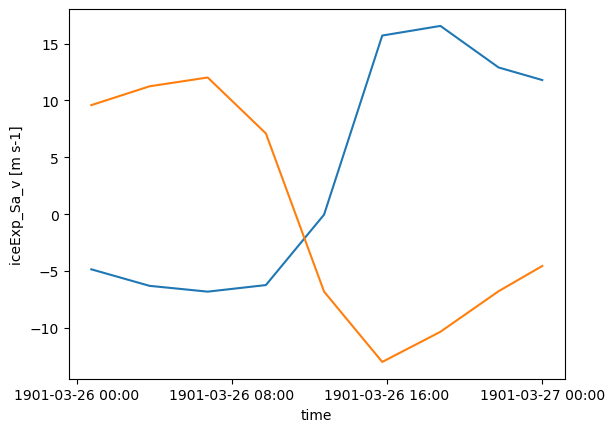

In [90]:
crash_point.iceExp_Sa_u.plot()
crash_point.iceExp_Sa_v.plot()


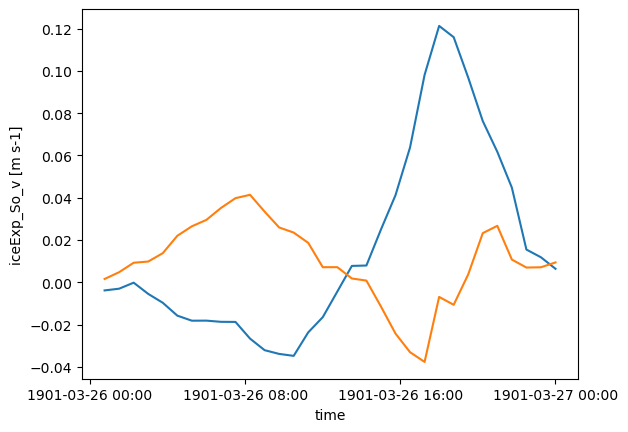

In [91]:
crash_point.iceExp_So_u.plot()
crash_point.iceExp_So_v.plot()

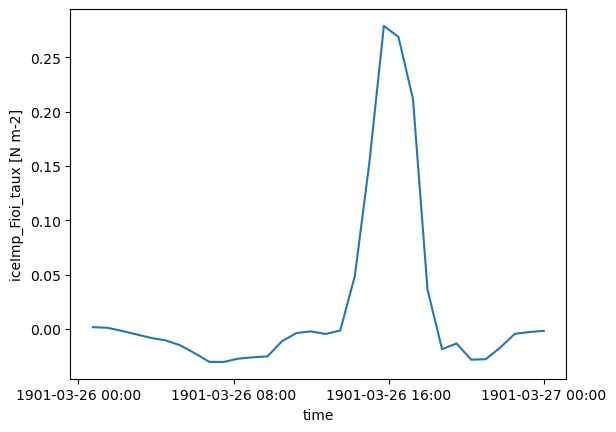

In [92]:
crash_point.iceImp_Fioi_taux.plot()

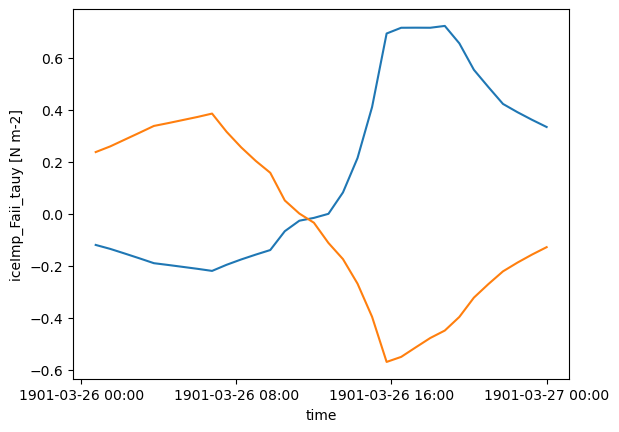

In [93]:
crash_point.iceImp_Faii_taux.plot()
crash_point.iceImp_Faii_tauy.plot()

In [94]:
ocn_cpl_files = ! ls access-om3.cpl.hi.ocn*

In [95]:
ocn_cpl_ds = xr.open_mfdataset(ocn_cpl_files)

In [96]:
ocn_crash_point = ocn_cpl_ds.isel(ocnExp_nx=1068,ocnExp_ny=1001, ocnImp_nx=1068,ocnImp_ny=1001)

In [97]:
ocn_crash_point

<xarray.Dataset> Size: 2GB
Dimensions:                (time: 32, ntb: 2, Med_frac_ocn_ny: 1080,
                            Med_frac_ocn_nx: 1440)
Coordinates:
  * time                   (time) object 256B 1901-03-26 00:45:00 ... 1901-03...
Dimensions without coordinates: ntb, Med_frac_ocn_ny, Med_frac_ocn_nx
Data variables: (12/45)
    time_bnds              (time, ntb) float64 512B dask.array<chunksize=(1, 2), meta=np.ndarray>
    ocnImp_Fioo_q          (time) float64 256B dask.array<chunksize=(1,), meta=np.ndarray>
    ocnImp_So_bldepth      (time) float64 256B dask.array<chunksize=(1,), meta=np.ndarray>
    ocnImp_So_dhdx         (time) float64 256B dask.array<chunksize=(1,), meta=np.ndarray>
    ocnImp_So_dhdy         (time) float64 256B dask.array<chunksize=(1,), meta=np.ndarray>
    ocnImp_So_omask        (time) float64 256B dask.array<chunksize=(1,), meta=np.ndarray>
    ...                     ...
    Med_frac_ocn_ifrac     (time, Med_frac_ocn_ny, Med_frac_ocn_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    Med_frac_ocn_ifrad     (time, Med_frac_ocn_ny, Med_frac_ocn_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    Med_frac_ocn_ofrac     (time, Med_frac_ocn_ny, Med_frac_ocn_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    Med_frac_ocn_ofrad     (time, Med_frac_ocn_ny, Med_frac_ocn_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    Med_frac_ocn_lon       (time, Med_frac_ocn_ny, Med_frac_ocn_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    Med_frac_ocn_lat       (time, Med_frac_ocn_ny, Med_frac_ocn_nx) float64 398MB dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
Attributes:
    file_version:   cmeps0
    model_doi_url:  unset

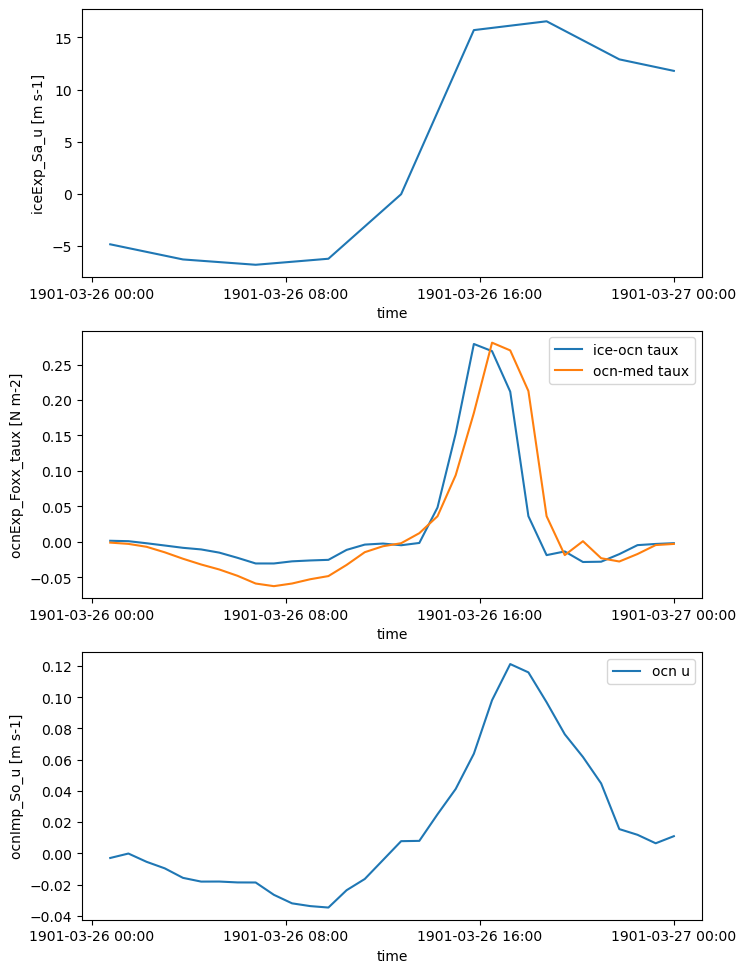

In [98]:
plt.figure(figsize=(8,16))
plt.subplot(4,1,1)
crash_point.iceExp_Sa_u.plot()
plt.subplot(4,1,2)
# crash_point.iceImp_Faii_taux.plot()
crash_point.iceImp_Fioi_taux.plot(label='ice-ocn taux')
# plt.subplot(4,1,3)
ocn_crash_point.ocnExp_Foxx_taux.plot(label='ocn-med taux')
plt.legend()
plt.subplot(4,1,3)
ocn_crash_point.ocnImp_So_u.plot(label='ocn u')
plt.legend()
# plt.subplot(5,1,5)
# ocn_crash_point.ocn

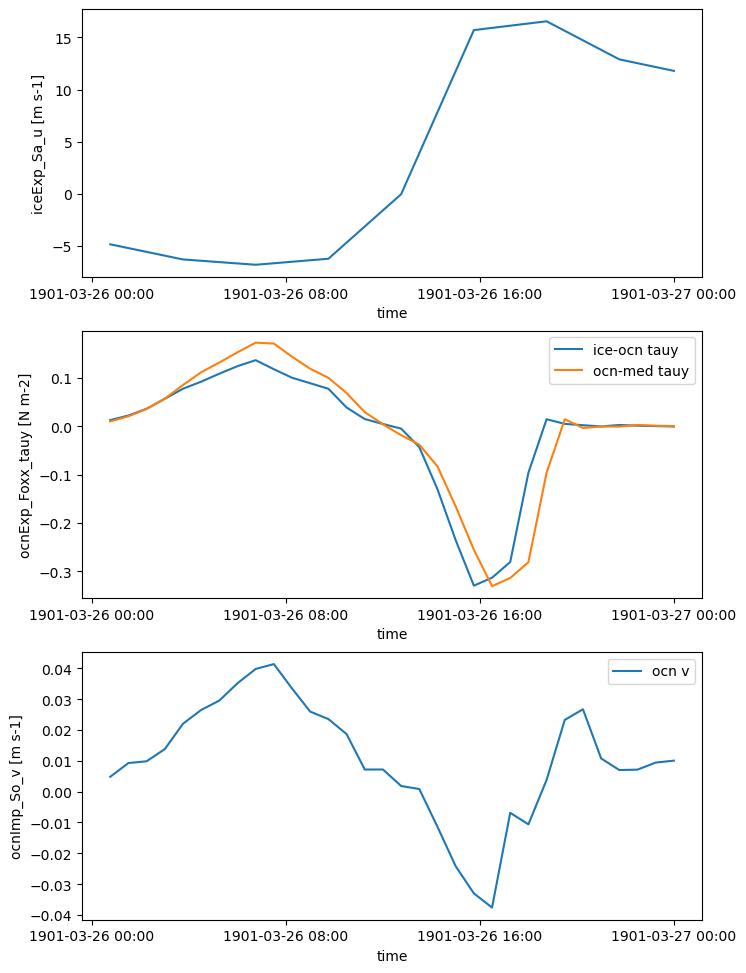

In [99]:
plt.figure(figsize=(8,16))
plt.subplot(4,1,1)
crash_point.iceExp_Sa_u.plot()
plt.subplot(4,1,2)
# crash_point.iceImp_Faii_taux.plot()
crash_point.iceImp_Fioi_tauy.plot(label='ice-ocn tauy')
# plt.subplot(4,1,3)
ocn_crash_point.ocnExp_Foxx_tauy.plot(label='ocn-med tauy')
plt.legend()
plt.subplot(4,1,3)
ocn_crash_point.ocnImp_So_v.plot(label='ocn v')
plt.legend()
# plt.subplot(5,1,5)
# ocn_crash_point.ocn